<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/Processamento_de_Linguagem_Natural_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NLP 

1. Bibliotecas : NLTK/spaCy

Obs¹: A spaCy tem uma aplicação mais interessante do que a NLTK
  
- Busca de Textos
- Extração de entidades nomeadas
- Wordcloud
- classificação de sentimentos

In [36]:
!pip install spacy==2.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!python -m spacy download pt

import bs4 as bs # processamento de dados da web (texto)
import urllib.request 
import nltk 
import spacy
#import pt_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 193.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.8/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.8/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [38]:
pln = spacy.load('pt')
pln

In [39]:
documento = pln('Estou aprendendo processamento de linguagem natural em São Paulo')
type(documento)

spacy.tokens.doc.Doc

In [40]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
em ADP
São PROPN
Paulo PROPN


In [41]:
# Lematização e Stemização

for token in documento:
  print(token.text, token.lemma_)

print('\n------\n')

# a lemmatização trabalha com os 'radicais' das palavras. Legal para redimensionar um texto muito grande
# Diferente da Stemização a Lemmatização é mais segura e garante que o sentido das palavras sejam mantidos

doc = pln('encontrei encontraria encontrou encontrado curso cursei cursado')
[token.lemma_ for token in doc]

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
em em
São São
Paulo Paulo

------



['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [42]:
nltk.download('rslp')
# faz a stemização (stemmers)

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [43]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem("aprender")

'aprend'

### Extraindo *dados*

In [44]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [45]:
dados = dados.read()
dados # o resultado é a leitura do código fonte da página que desejamos analisar

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limite

In [46]:
dados_html = bs.BeautifulSoup(dados, 'lxml') # ocorre a leitura da marcação
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){va

In [47]:
paragrafos = dados_html.find_all('p')

In [48]:
len(paragrafos) # 110 parágrafos
paragrafos[0]

<p>
			Páginas para editores sem sessão iniciada <a aria-label="Saiba mais sobre edição" data-mw="interface" href="/wiki/Ajuda:Introduction"><span>saber mais</span></a>
</p>

In [49]:
for p in paragrafos:
  print(p) # printando todos os parágrafos.

<p>
			Páginas para editores sem sessão iniciada <a aria-label="Saiba mais sobre edição" data-mw="interface" href="/wiki/Ajuda:Introduction"><span>saber mais</span></a>
</p>
<p>Na <a href="/wiki/Tecnologia" title="Tecnologia">tecnologia</a>, a <b>Inteligência Artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>Artificial Intelligence</i>, de sigla: <b>AI</b>) é a <a href="/wiki/Intelig%C3%AAncia" title="Inteligência">inteligência</a> demonstrada por <a href="/wiki/M%C3%A1quina" title="Máquina">máquinas</a> ao executar tarefas complexas associadas a seres inteligentes,<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span>[</span>1<span>]</span></a></sup> além de também ser um campo de estudo acadêmico,<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span>[</span>2<span>]</span></a></sup> no qual o principal objetivo é de executar funções de modo autônomo. 
</p>
<p>É um conceito amplo e que recebe t

In [50]:
for p in paragrafos:
  print(p.text) # retorna o texto puro de todos os parágrafos


			Páginas para editores sem sessão iniciada saber mais

Na tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. 

É um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]

O desenvolv

In [51]:
conteudo = ''

# extraíndo o conteúdo completo da página 
for p in paragrafos:
  conteudo += p.text

In [52]:
conteudo

'\n\t\t\tPáginas para editores sem sessão iniciada saber mais\nNa tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. \nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\nO dese

In [53]:
conteudo = conteudo.lower()
conteudo

'\n\t\t\tpáginas para editores sem sessão iniciada saber mais\nna tecnologia, a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. \né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\no dese

In [54]:
string = "turing"
token_pesquisa = pln(string)

from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3381, 3382),
 (8661325627334373315, 3391, 3392),
 (8661325627334373315, 3547, 3548),
 (8661325627334373315, 3552, 3553),
 (8661325627334373315, 3558, 3559),
 (8661325627334373315, 3621, 3622),
 (8661325627334373315, 4253, 4254),
 (8661325627334373315, 5528, 5529),
 (8661325627334373315, 8997, 8998),
 (8661325627334373315, 9133, 9134),
 (8661325627334373315, 9229, 9230),
 (8661325627334373315, 9346, 9347)]

In [55]:
doc[3381:3382], doc[3391-5:3392+5]

(turing, chamou depois de teste de turing (tt),[32] de 1950)

In [56]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

### Extração de Entidades Nomeadas (NER) : _Named-Entity Recognition_

- Aplicado por chatobots para saber sobre qual a entidade de assunto

In [57]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

acadêmico,[2 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
circulares.[9 MISC
conexionismo[10 MISC
simbólica[11 MISC
prolog MISC
clips PER
vertente[11 MISC
aleatórios[14 MISC
gpt-3[15 MISC
profundas[16 MISC
transformers[17 MISC
google ORG
wikipédia MISC
john mccarthy PER
racionalmente".[12][19 ORG
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[22 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
andreas kaplan PER
michael haenlein PER
flexível”.[23 MISC
john mccarthy PER
gubern PER
román LOC
john h

In [58]:
from spacy import displacy

displacy.render(doc, style = "ent", jupyter=True)

### Nuvens de Palavras

In [59]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'quais', 'sem', 'assim', 'temos', 'final', 'algo', 'tipo', 'das', 'aqui', 'estivestes', 'nossas', 'desta', 'debaixo', 'dezoito', 'vez', 'veja', 'conselho', 'nesse', 'máximo', 'estás', 'oitavo', 'puderam', 'nas', 'área', 'possível', 'numa', 'são', 'quando', 'esses', 'tua', 'iniciar', 'alguns', 'número', 'aqueles', 'parte', 'vossa', 'menor', 'todo', 'em', 'logo', 'fui', 'maiorias', 'oitava', 'eles', 'essas', 'valor', 'meu', 'certeza', 'nós', 'contra', 'por', 'na', 'dizem', 'números', 'inicio', 'sou', 'saber', 'vem', 'cento', 'dizer', 'daquela', 'estiveste', 'geral', 'usar', 'diz', 'enquanto', 'perto', 'mês', 'maior', 'ou', 'sobre', 'sois', 'estava', 'nos', 'apontar', 'oito', 'elas', 'embora', 'fazemos', 'devem', 'custa', 'meses', 'fazem', 'cujo', 'vezes', 'minha', 'pouco', 'nessa', 'tiveste', 'faço', 'vêm', 'me', 'ora', 'coisa', 'cá', 'comprido', 'deste', 'segundo', 'aquela', 'desde', 'teve', 'possivelmente', 'fazia', 'fazeis', 'te', 'fomos', 'foste', 'nossa', 'mil', 'através', 'têm', '

In [60]:
len(STOP_WORDS)

413

In [61]:
doc = pln(conteudo)
lista_token = []

for token in doc:
  lista_token.append(token.text)
print(lista_token)

['\n\t\t\t', 'páginas', 'para', 'editores', 'sem', 'sessão', 'iniciada', 'saber', 'mais', '\n', 'na', 'tecnologia', ',', 'a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'a', 'inteligência', 'demonstrada', 'por', 'máquinas', 'a', 'o', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes,[1', ']', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico,[2', ']', 'no', 'qual', 'o', 'principal', 'objetivo', 'é', 'de', 'executar', 'funções', 'de', 'modo', 'autônomo', '.', '\n', 'é', 'um', 'conceito', 'amplo', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'significados', 'diferentes', 'à', 'palavra', 'inteligência.[3', ']', 'é', 'possível', 'considerar', 'algumas', 'características', 'básicas', 'd', 'esses', 'sistemas', ',', 'como', 'a', 'capacidade', 'de', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'a', 'um', 'conjunto

In [62]:
sem_stop = []

for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [63]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'red', 'green', 'magenta'])

In [64]:
from wordcloud import WordCloud
cloud = WordCloud(background_color ='white', max_words = 100, colormap=color_map)

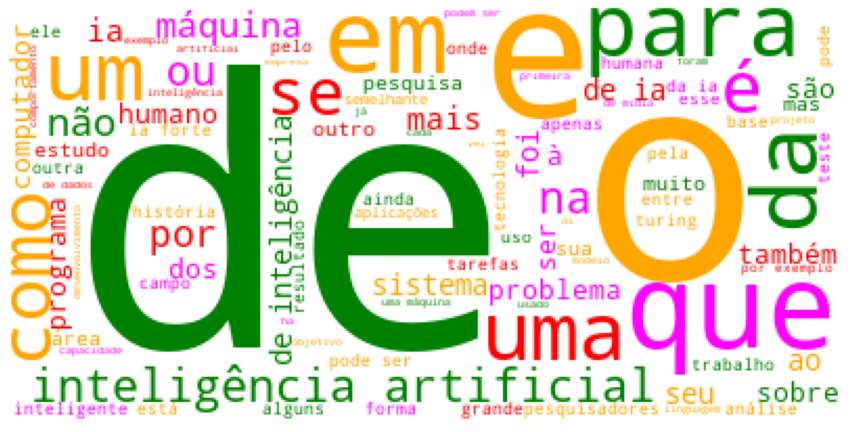

In [65]:
import matplotlib.pyplot as plt 
cloud = cloud.generate(conteudo)
plt.figure(figsize=(15,30))
plt.imshow(cloud)
plt.axis('off')
plt.show()

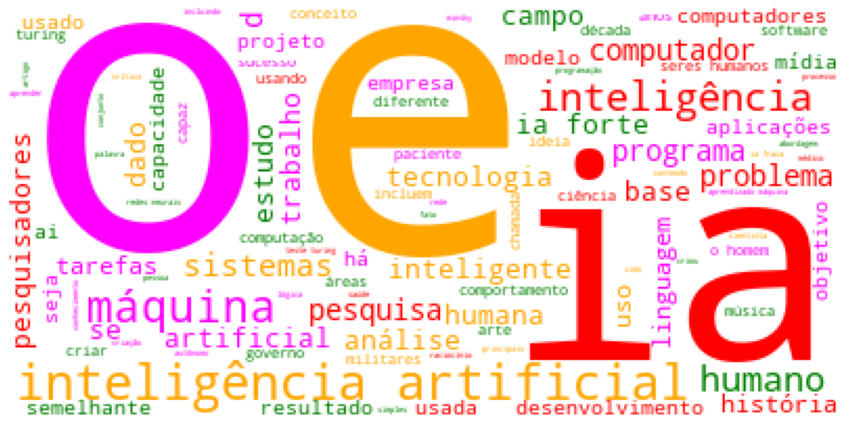

In [66]:
# usando apenas as não stop words

cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,30))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### Análise de Sentimentos com spaCy

In [67]:
import pandas as pd
import string
import random
import seaborn as sns
import numpy as np

In [68]:
# vamos utilizar o spacy para construir um modelo de análise de sentimentos

base_dados = pd.read_csv('base_treinamento.txt', encoding = 'utf-8')
base_dados

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


In [69]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


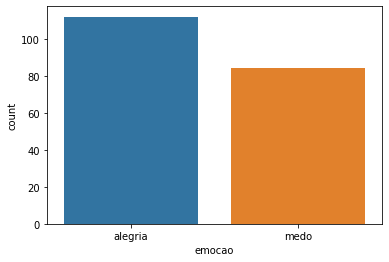

In [70]:
sns.countplot(base_dados['emocao'], label = "Contagem");

In [71]:
# Pré processamento dos textos (Função)


pontuacoes = string.punctuation # pegando as pontuações do texto
stop_words = STOP_WORDS # pegando as stop words

# função que trata o texto, remove pontuações e stop_words. Além de remover os dígitos
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  return lista




In [72]:
teste = preprocessamento("Estou 1500 aPrendendo NLP 100000")
teste

'aprender nlp'

In [73]:
# o comando apply aplicada a função para cada texto dentro da base
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)
base_dados.head(10) # observe que o texto já está pré-processado

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


In [74]:
# Tratando a classe

base_dados_f = []
i = 0 

for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)

  if emocao == 'alegria':
    dici = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dici = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_f.append([texto, dici.copy()])


In [75]:
len(base_dados_f)

196

In [76]:
base_dados_f[0], base_dados_f[0][0], base_dados_f[0][1], base_dados_f, type(base_dados_f[0][1])


(['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 'trabalhar agradável',
 {'ALEGRIA': True, 'MEDO': False},
 [['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
  ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
  ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
  ['admirar', {'ALEGRIA': True, 'MEDO': False}],
  ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
  ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
  ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
  ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
  ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
  ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
  ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
  ['amar', {'ALEGRIA': True, 'MEDO': False}],
  ['alívio', {'ALEGRIA': True, 'MEDO': False}],
  ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
  ['achar apaixonar', {'ALEGRIA': True, 'MEDO': F

In [77]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [78]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_f)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_f, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.0071541909128427505}
{'textcat': 3.1181399684498956e-08}
{'textcat': 9.335399009380296e-09}
{'textcat': 6.27184490453736e-09}
{'textcat': 3.860848224457314e-09}
{'textcat': 2.7471272340262587e-09}
{'textcat': 1.9520240562842517e-09}
{'textcat': 1.3989956137994142e-09}
{'textcat': 1.2246416242200908e-09}
{'textcat': 1.2646923439052493e-09}


In [80]:
historico_loss = []

for i in historico:
  historico_loss.append(i.get('textcat')) # usamos o método .get() para pegar um valor de um dicionário

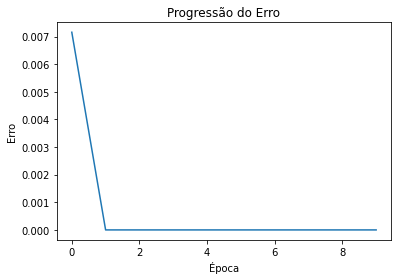

In [81]:
historico_loss = np.array(historico_loss)
historico_loss

plt.plot(historico_loss)
plt.title("Progressão do Erro")
plt.xlabel('Época')
plt.ylabel('Erro')
plt.show()

In [82]:
modelo.to_disk('modelo')

In [84]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [85]:
texto_positivo = 'Eu adoro a cor dos seus olhos'

In [87]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar o cor olhar'

In [88]:
# Fazendo uma previsão

previsao = modelo_carregado(texto_positivo)
previsao

adorar o cor olhar

In [89]:
previsao.cats

{'ALEGRIA': 0.9994462132453918, 'MEDO': 0.001015315530821681}

In [90]:
texto_negativo = "Estou com medo do resultado"

previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 0.04163788631558418, 'MEDO': 0.977773904800415}

### Avaliação do Modelo

In [92]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)

  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [93]:
previsoes

[{'ALEGRIA': 0.9999464750289917, 'MEDO': 0.00035258728894405067},
 {'ALEGRIA': 0.9996732473373413, 'MEDO': 0.00020380457863211632},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9998020529747009, 'MEDO': 0.00036644539795815945},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.00023257014981936663},
 {'ALEGRIA': 0.9996682405471802, 'MEDO': 0.0002830636512953788},
 {'ALEGRIA': 0.9998792409896851, 'MEDO': 0.0002665279316715896},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.00030145153868943453},
 {'ALEGRIA': 0.9998917579650879, 'MEDO': 8.24846574687399e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 0.00010677132377168164},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9998788833618164, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.99995

In [94]:
previsoes_final = []

for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')
    
previsoes_final = np.array(previsoes_final)

In [95]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [96]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [97]:
# vamos comparar respostas_reais com previsoes_final

from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(respostas_reais, previsoes_final)

1.0

In [98]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm 

array([[112,   0],
       [  0,  84]])

### Avaliação da base de teste

In [99]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [100]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [101]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [103]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)

  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

  

previsoes_final = []

for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')
    
previsoes_final = np.array(previsoes_final)

In [104]:
respostas_reais = base_dados_teste['emocao'].values
accuracy_score(respostas_reais, previsoes_final)

0.5833333333333334

In [105]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[34, 14],
       [21, 15]])